In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import gmaps
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy import stats
import requests
import time
import os
from scipy.stats import linregress

# Output File (CSV)
output_data_file20 = "csv_folder/2020/03.csv"
output_data_file19 = "csv_folder/2019/03.csv"
output_data_file18 = "csv_folder/2018/03.csv"
output_data_file17 = "csv_folder/2017/03.csv"
output_data_file16 = "csv_folder/2016/05.csv"
output_data_file15 = "csv_folder/2015/05.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
import gmaps

from api_keys import g_key

In [36]:
#Nico
Air_15 = pd.read_csv(output_data_file15)
Air_16 = pd.read_csv(output_data_file16)
Air_17 = pd.read_csv(output_data_file17)
Air_18 = pd.read_csv(output_data_file18)
Air_19 = pd.read_csv(output_data_file19)
Air_20 = pd.read_csv(output_data_file20)

In [2]:
air_df = pd.read_csv(output_data_file20)

air_df1 = pd.read_csv(output_data_file15)
air_df.head()

,id,listing_url,host_id,host_url,host_name,host_is_superhost,host_neighbourhood,host_listings_count,street,neighbourhood,...,has_availability,number_of_reviews,number_of_reviews_ltm,review_scores_rating,require_guest_profile_picture,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month,host_acceptance_rate
0,109,https://www.airbnb.com/rooms/109,521,https://www.airbnb.com/users/show/521,Paolo,f,Culver City,1.0,"Culver City, CA, United States",Culver City,...,t,2,0,80.0,t,1,1,0,0.02,0.00
1,344,https://www.airbnb.com/rooms/344,767,https://www.airbnb.com/users/show/767,Melissa,f,Burbank,1.0,"Burbank, CA, United States",Burbank,...,t,8,2,97.0,f,1,1,0,0.18,0.22
2,2708,https://www.airbnb.com/rooms/2708,3008,https://www.airbnb.com/users/show/3008,Chas.,t,Hollywood,2.0,"Los Angeles, CA, United States",Hollywood,...,t,23,8,98.0,f,2,0,2,0.33,0.94
3,2732,https://www.airbnb.com/rooms/2732,3041,https://www.airbnb.com/users/show/3041,Yoga Priestess,f,Santa Monica,2.0,"Santa Monica, CA, United States",Santa Monica,...,t,21,3,94.0,f,2,1,1,0.20,0.75
4,2864,https://www.airbnb.com/rooms/2864,3207,https://www.airbnb.com/users/show/3207,Bernadine,f,Bellflower,1.0,"Bellflower, CA, United States",Bellflower,...,t,0,0,NaN,f,1,1,0,NaN,NaN


In [3]:
# google maps
url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json" + g_key


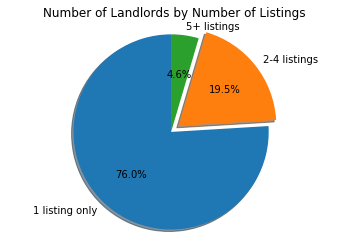

In [4]:
#Derek
# Number of landlords by how many listings they have.
host_number = air_df.groupby(['host_id'])
host_number = host_number.count()
#22274 hosts or landlords

host_number1 = host_number.loc[(host_number['id']) == 1]
host_number1 = host_number1['id'].count()
#16919 landlords with 1 listing only


host_number2 = host_number.loc[(host_number['id'] >= 2) & (host_number['id'] < 5)]
host_number2 = host_number2['id'].count()
#4339 landlords with 2-4 listings only


host_number5 = host_number.loc[(host_number['id'] >= 5)]
host_number5 = host_number5['id'].count()
#20 landlords with 50+ listings only

labels = '1 listing only', '2-4 listings', '5+ listings'
sizes = [host_number1, host_number2, host_number5]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Number of Landlords by Number of Listings")
plt.savefig('images/landlord_listings.png')

plt.show()


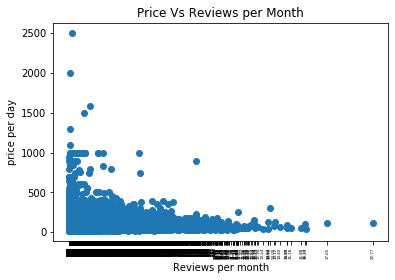

In [5]:
#Derek
# Relationship between the number of reviews_per_month and price per night for 1 bedroom listings 

new_df1 = air_df.loc[(air_df['bedrooms'] == 1)]
new_df1 = new_df1.loc[(air_df['price'] < 5000) & (air_df['price'] > 20)]
reviews_month = new_df1['reviews_per_month']
price_paid = new_df1['price']

ran_dict = {
    "Reviews": reviews_month,
    "Price": price_paid
}

new_df2 = pd.DataFrame(ran_dict)
new_df3 = new_df2.dropna(axis=0, how='any', inplace=False)

y = new_df3['Price']
x = new_df3['Reviews']

plt.scatter(x, y)
plt.xticks(x, rotation=90,fontsize=4)
plt.xlabel('Reviews per month')
plt.ylabel('price per day')
plt.title("Price Vs Reviews per Month")

plt.show()


In [6]:
#Derek
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(f'Sample size: {y.count()}. The correlation coefficient:{round(st.pearsonr(x,y)[0],2)}, the {stats.linregress(x,y)}, r-squared: {r_value**2}')
print(f'For every 1 increase in the Reviews per Month of the listing you could expect a ${round(slope,2)} decrease in the price paid per day. A coefficient of determination equal to {round(st.pearsonr(x,y)[0],2)} indicates that about {round(st.pearsonr(x,y)[0],2)*100}% of the variation in prices paid per day (the dependent variable) can be explained by the relationship to the Reviews per Month. The results are statitistically significant with a p-value {round(p_value,2)} is below the threshold of .05. However, the results show a very weak negative linear relationship or no linear relationhip with a correlation coefficient of {round(st.pearsonr(x,y)[0],2)}.')

Sample size: 17618. The correlation coefficient:-0.04, the LinregressResult(slope=-1.790661957885719, intercept=100.95593925289761, rvalue=-0.044391533911466594, pvalue=3.753607031487497e-09, stderr=0.30362076497553964), r-squared: 0.0019706082830128887
For every 1 increase in the Reviews per Month of the listing you could expect a $-1.79 decrease in the price paid per day. A coefficient of determination equal to -0.04 indicates that about -4.0% of the variation in prices paid per day (the dependent variable) can be explained by the relationship to the Reviews per Month. The results are statitistically significant with a p-value 0.0 is below the threshold of .05. However, the results show a very weak negative linear relationship or no linear relationhip with a correlation coefficient of -0.04.


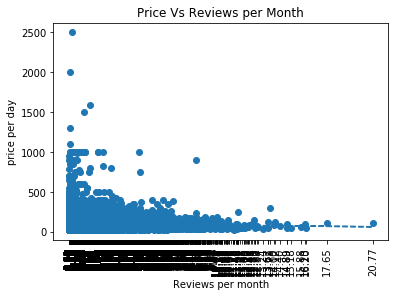

In [7]:
#Derek
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x, y)
vc_fit = vc_slope * x + vc_int

plt.scatter(x,y)
plt.plot(x,vc_fit,"--")
plt.xticks(x, rotation=90)
plt.xlabel('Reviews per month')
plt.ylabel('price per day')
plt.title("Price Vs Reviews per Month")
plt.savefig('images/price_reviews.png')
plt.show()


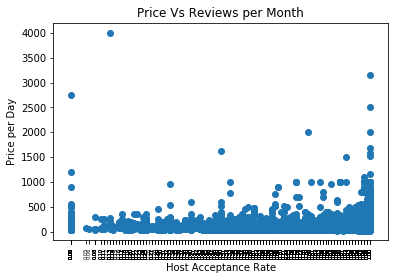

In [8]:
#Derek
# Relationship between host_acceptance_rate and price per night for 1 bedroom listings

ran_var = air_df.loc[(air_df['bedrooms'] == 1)]
ran_var = ran_var.loc[(air_df['price'] < 5000) & (air_df['price'] > 20)]

acc_rate = ran_var['host_acceptance_rate']
# price_paid = new_df1['price']
acc_dict = {
    "host_acceptance": acc_rate,
    "Price_acc": price_paid
}

acc_df2 = pd.DataFrame(acc_dict)
acc_df3 = acc_df2.dropna(axis=0, how='any', inplace=False)

y2 = acc_df3['Price_acc']
x2 = acc_df3['host_acceptance']

plt.scatter(x2, y2)
plt.xticks(x2, rotation=90,fontsize=5)
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Price per Day')
plt.title("Price Vs Reviews per Month")

plt.show()


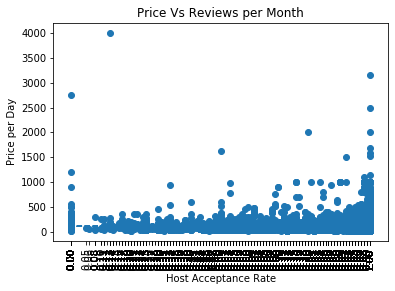

In [9]:
#Derek
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x2, y2)
vc_fit = vc_slope * x2 + vc_int

plt.scatter(x2,y2)
plt.plot(x2,vc_fit,"--")
plt.xticks(x2, rotation=90)
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Price per Day')
plt.title("Price Vs Reviews per Month")
plt.savefig('images/price_reviews.png')
plt.show()


In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x2,y2)
print(f'Sample size: {y2.count()}. The correlation coefficient:{round(st.pearsonr(x2,y2)[0],2)}, the {stats.linregress(x2,y2)}, r-squared: {r_value**2}')
print(f'For every 1 increase in the host acceptance rate of the listing you could expect a ${round(slope,2)} decrease in the price paid per day. A coefficient of determination equal to {round(st.pearsonr(x2,y2)[0],2)} indicates that about {round(st.pearsonr(x2,y2)[0],2)*100}% of the variation in prices paid per day (the dependent variable) can be explained by the relationship to the host acceptance rate. This shows a very weak negative linear relationship or no linear relationhip with a correlation coefficient of {round(st.pearsonr(x2,y2)[0],2)}. The results are statitistically significant with p-value {round(p_value,0)} below the threshold of .05')


Sample size: 18220. The correlation coefficient:-0.02, the LinregressResult(slope=-10.144268744830955, intercept=111.46010160728717, rvalue=-0.02188772782363657, pvalue=0.003130857141450057, stderr=3.4329356561138242), r-squared: 0.00047907262928159454
For every 1 increase in the host acceptance rate of the listing you could expect a $-10.14 decrease in the price paid per day. A coefficient of determination equal to -0.02 indicates that about -2.0% of the variation in prices paid per day (the dependent variable) can be explained by the relationship to the host acceptance rate. This shows a very weak negative linear relationship or no linear relationhip with a correlation coefficient of -0.02. The results are statitistically significant with p-value 0.0 below the threshold of .05


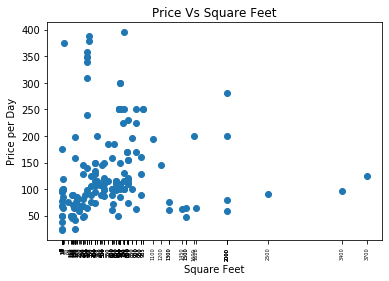

In [11]:
#Derek
# Relationship between price and square feet.
ran_var2 = air_df.loc[(air_df['bedrooms'] == 1)]
ran_var2 = ran_var2.loc[(air_df['price'] < 5000) & (air_df['price'] > 20)]
ran_var2 = ran_var2.loc[(air_df['square_feet'] < 5000)]

square_feet = ran_var2['square_feet']
price_paid1 = new_df1['price']
square_dict = {
    "square_feet": square_feet,
    "Price_sq": price_paid1
}

square_df2 = pd.DataFrame(square_dict)
square_df3 = square_df2.dropna(axis=0, how='any', inplace=False)

y3 = square_df3['Price_sq']
x3 = square_df3['square_feet']
plt.scatter(x3, y3)
plt.xticks(x3, rotation=90,fontsize=5)
plt.xlabel('Square Feet')
plt.ylabel('Price per Day')
plt.title("Price Vs Square Feet")

#159 non null values for square feet
plt.show()


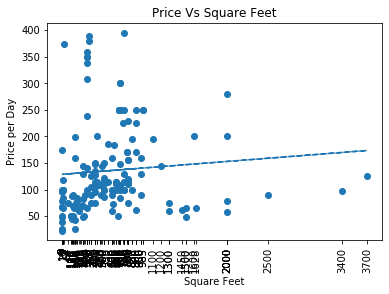

In [12]:
# Derek
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x3, y3)
vc_fit = vc_slope * x3 + vc_int

plt.scatter(x3,y3)
plt.plot(x3,vc_fit,"--")
plt.xticks(x3, rotation=90)
plt.xlabel('Square Feet')
plt.ylabel('Price per Day')
plt.title("Price Vs Square Feet")
plt.savefig('images/price_sq_feet.png')
plt.show()


In [13]:
#Derek
slope, intercept, r_value, p_value, std_err = stats.linregress(x3,y3)
print(f'Sample size: {y3.count()}. The correlation coefficient:{round(st.pearsonr(x3,y3)[0],2)}, the {stats.linregress(x3,y3)}, r-squared: {r_value**2}')
print(f'For every 1 increase in the square feet of the listing you could expect a ${round(slope,2)} increase in the price paid per day. A coefficient of determination equal to {round(st.pearsonr(x3,y3)[0],2)} indicates that about {round(st.pearsonr(x3,y3)[0],2)*100}% of the variation in prices paid per day (the dependent variable) can be explained by the relationship to the number of people a listing will accommodate. These results shows a very weak positive linear relationship with a correlation coefficient of {round(st.pearsonr(x3,y3)[0],2)}, but the results are not statitistically significant with a p-value of {round(p_value,2)} is above the threshold of .05.')

Sample size: 154. The correlation coefficient:0.08, the LinregressResult(slope=0.012105287158244717, intercept=128.79889883767996, rvalue=0.08198931616531108, pvalue=0.3120766828814734, stderr=0.011935246472587816), r-squared: 0.006722247965255341
For every 1 increase in the square feet of the listing you could expect a $0.01 increase in the price paid per day. A coefficient of determination equal to 0.08 indicates that about 8.0% of the variation in prices paid per day (the dependent variable) can be explained by the relationship to the number of people a listing will accommodate. These results shows a very weak positive linear relationship with a correlation coefficient of 0.08, but the results are not statitistically significant with a p-value of 0.31 is above the threshold of .05.


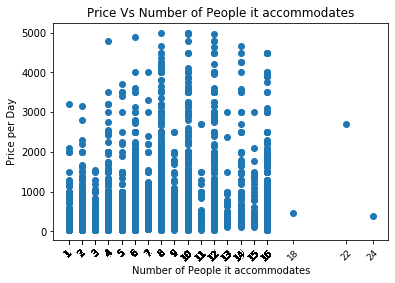

In [14]:
#Derek
# Relationship between Price per day and the Number of people the listings accommodate

ran_var3 = air_df.loc[(air_df['price'] < 5000) & (air_df['price'] > 20)]
bedrooms = ran_var3['accommodates']

price_paid3 = air_df['price']
bedroom_dict = {
    "accommodates": bedrooms,
    "Price_bd": price_paid3
}

bedroom_df = pd.DataFrame(bedroom_dict)

bedroom_df = bedroom_df.dropna(axis=0, how='any', inplace=False)

y4 = bedroom_df['Price_bd']
x4 = bedroom_df['accommodates']
plt.scatter(x4, y4)
plt.xticks(x4, rotation=45,fontsize=9)
plt.xlabel('Number of People it accommodates')
plt.ylabel('Price per Day')
plt.title("Price Vs Number of People it accommodates")
#159 non null values for square feet
plt.show()

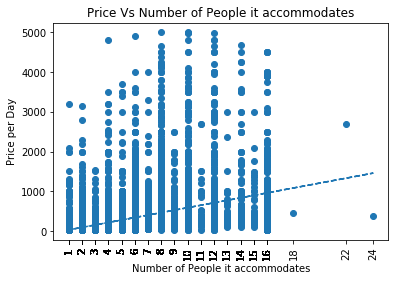

In [18]:
#Derek
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x4, y4)
vc_fit = vc_slope * x4 + vc_int

plt.scatter(x4,y4)
plt.plot(x4,vc_fit,"--")
plt.xticks(x4, rotation=90)
plt.xlabel('Number of People it accommodates')
plt.ylabel('Price per Day')
plt.title("Price Vs Number of People it accommodates")
plt.savefig('images/price_accommodates.png')
plt.show()


In [19]:
#Derek
slope, intercept, r_value, p_value, std_err = stats.linregress(x4,y4)
print(f'Sample size: {y4.count()}. The correlation coefficient:{round(st.pearsonr(x4,y4)[0],2)}, the {stats.linregress(x4,y4)}, r-squared: {r_value**2}')
print(f'For every 1 increase in the number of people a listing will accommodate you could expect a ${round(slope,2)} increase in the price paid per day. A coefficient of determination equal to {round(st.pearsonr(x4,y4)[0],2)} indicates that about {round(st.pearsonr(x4,y4)[0],2)*100}% of the variation in prices paid per day (the dependent variable) can be explained by the relationship to the number of people a listing will accommodate. This shows a moderate positive linear relationship with a correlation coefficient of {round(st.pearsonr(x4,y4)[0],2)}. The results are statitistically significant with a p-value {p_value} below the threshold of .05')


Sample size: 38075. The correlation coefficient:0.5, the LinregressResult(slope=62.05303772432381, intercept=-33.41595209049444, rvalue=0.49582277058894614, pvalue=0.0, stderr=0.557005794566384), r-squared: 0.24584021983449872
For every 1 increase in the number of people a listing will accommodate you could expect a $62.05 increase in the price paid per day. A coefficient of determination equal to 0.5 indicates that about 50.0% of the variation in prices paid per day (the dependent variable) can be explained by the relationship to the number of people a listing will accommodate. This shows a moderate positive linear relationship with a correlation coefficient of 0.5. The results are statitistically significant with a p-value 0.0 below the threshold of .05


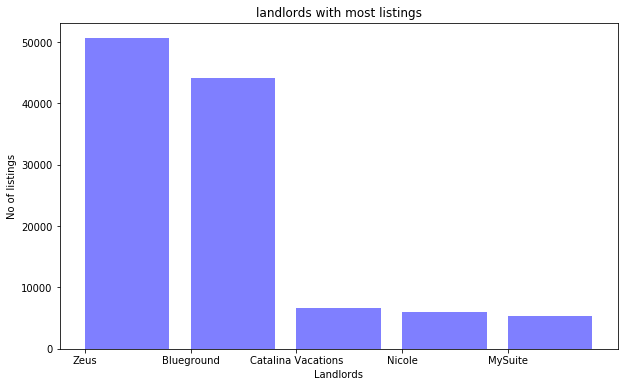

In [21]:
# Nisha
#Showed a bar chart of the landlords with most listings in descending order
#counts number of host
host_count =air_df['calculated_host_listings_count'].count()
#finding total unit listing per host
plot_df =pd.DataFrame(air_df.groupby(['host_name', 'host_id'])['calculated_host_listings_count'].sum())
plot_df = plot_df.reset_index()
#sortting lists in desending order
sorted_plot_df = plot_df.sort_values('calculated_host_listings_count',ascending=False)
#displaying top 5 host
sorted_plot_df = sorted_plot_df.head(5)
#plotting bar chart
plt.figure(figsize=(10,6))
plt.bar(sorted_plot_df['host_name'].to_list(), sorted_plot_df['calculated_host_listings_count'], color='b', alpha=0.5, align="edge")
#setting lable and title
plt.title("landlords with most listings")
plt.xlabel("Landlords")
plt.ylabel("No of listings")
# Prints the bar plot to the screen
plt.show()

In [22]:
# Nisha
#Comparing which host is the busiest
sorted_plot_df.head(1)

,host_name,host_id,calculated_host_listings_count
22086,Zeus,48005494,50625


In [23]:
# Nisha
#Show the number of landlords that have units that only accommodates 1 person
# count(host_id) where accomodates = 1
landlord_number = air_df.loc[(air_df['accommodates']) == 1]
landlord_number['host_id'].count()

4294

In [24]:
# Nisha
# What kind of makeup to show most expensive and least expensive prices each number of people it holds... 1-2, 2-6, 7+ accommodates?
# max(price) and min(price) where accomodates between 1 and 2
max_number = air_df.loc[(air_df['accommodates'] >= 1) & (air_df['accommodates'] < 3)]
max_number['price'].max()
#max price is $15000.0
max_number['price'].min()
 #min price is 0
#max(price) and min(price) where accomodates between 2 and 6
max_number2 = air_df.loc[(air_df['accommodates'] >= 2) & (air_df['accommodates'] < 7)]
max_number2['price'].max()
#max price is $15000
max_number2['price'].min()
#min is 0
# max(price) and min(price) where accomodates greater than 7
max_number3 = air_df.loc[(air_df['accommodates'] > 7)]
max_number3['price'].max()
#max value is $25000.0
max_number3['price'].min()
#min value is 10

10.0

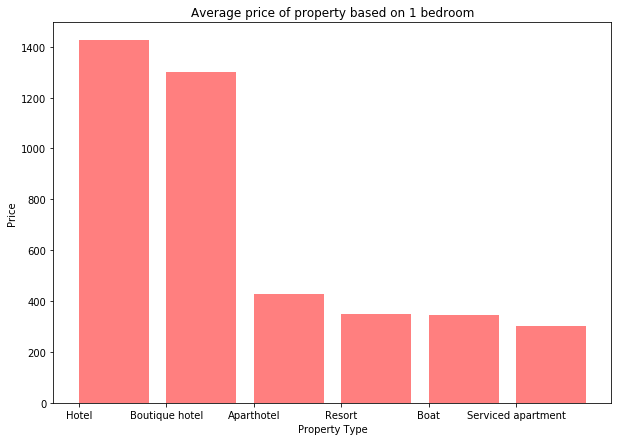

In [25]:
# Nisha
#Bar chart showing average price for each property type. Each property type on x-axis, price on y-axis
#Variables: property_type, price [‘bedrooms’] == 1
single_accomodate_df = air_df.loc[(air_df['bedrooms']) == 1]
single_accomodate_avg_price =pd.DataFrame(single_accomodate_df.groupby('property_type')['price'].mean())
single_accomodate_avg_price = single_accomodate_avg_price.sort_values('price',ascending=False).head(6)
single_accomodate_avg_price
plt.figure(figsize=(10,7))
#plotting bar chart
plt.bar(single_accomodate_avg_price.index.tolist(), single_accomodate_avg_price['price'], color='r', alpha=0.5, align="edge")
#setting lable and title
plt.title("Average price of property based on 1 bedroom")
plt.xlabel("Property Type")
plt.ylabel("Price in $dollars")
plt.show()

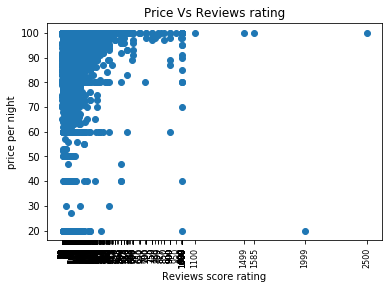

In [29]:
# Nisha
# March 2020 only
# Q Any relationship between review_scores_rating and price per night for 1 bedroom listings
# Variables: [‘review_scores_rating’] and [‘price’] where [‘bedrooms’] == 1
new_df6 = air_df.loc[(air_df['bedrooms'] == 1)]
new_df6 = new_df6.loc[(air_df['price'] < 5000) & (air_df['price'] > 20)]
# new_df1
# new_df1 = new_df1.loc[(air_df['price'] > 20)]
reviews_rate = new_df6['review_scores_rating']
price_per_night = new_df6['price']
ran_dict = {
    "Reviews_rate": reviews_rate,
    "Price_night": price_per_night
}
new_df6 = pd.DataFrame(ran_dict)
# new_df6
new_df7 = new_df6.dropna(axis=0, how='any', inplace=False)
new_df7
y5 = new_df7['Reviews_rate']
x5 = new_df7['Price_night']
plt.scatter(x5, y5)
plt.xticks(x5, rotation=90,fontsize=8)
plt.xlabel('Reviews score rating')
plt.ylabel('price per night')
plt.title("Price Vs Reviews rating")
#good_dataset_cap
plt.show()

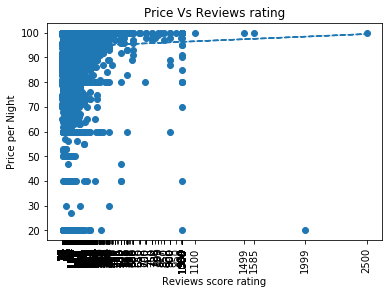

In [30]:
# Nisha

vc_fit = vc_slope * x5 + vc_int
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x5, y5)

plt.scatter(x5,y5)
plt.plot(x5,vc_fit,"--")
plt.xticks(x5, rotation=90)
plt.xlabel('Reviews score rating')
plt.ylabel('Price per Night')
plt.title("Price Vs Reviews rating")
plt.show()

In [31]:
# print(f"The correlation coefficient {round(st.pearsonr(x,y)[0],2)}. R2, slope, p-value")
# stats.ttest_ind(x, y, equal_var=False)

In [46]:
#Nisha
slope, intercept, r_value, p_value, std_err = stats.linregress(x5,y5)
print(f'Sample size: {y5.count()}. The correlation coefficient:{round(st.pearsonr(x5,y5)[0],2)}, the {stats.linregress(x5,y5)}, r-squared: {r_value**2}')
print(f'For every 1 unit increase in the Reviews score rating of the listing you could expect a ${round(slope,5)} increase in the price paid per day. A coefficient of determination equal to {round(st.pearsonr(x5,y5)[0],2)} indicates that about {round(st.pearsonr(x5,y5)[0],2)*100}% of the variation in prices paid per day (the dependent variable) can be explained by the relationship to the Reviews score rating. These results show no linear relationship with a correlation coefficient of {round(st.pearsonr(x5,y5)[0],2)}. The results are statistically significant with a p-value of {round(p_value,2)} is below the threshold of .05.')


Sample size: 17336. The correlation coefficient:0.02, the LinregressResult(slope=0.0020998294161328553, intercept=94.24421385867463, rvalue=0.018990445888808008, pvalue=0.012403708905546599, stderr=0.0008396941583668474), r-squared: 0.00036063703505574495
For every 1 unit increase in the Reviews score rating of the listing you could expect a $0.0021 increase in the price paid per day. A coefficient of determination equal to 0.02 indicates that about 2.0% of the variation in prices paid per day (the dependent variable) can be explained by the relationship to the Reviews score rating. These results show no linear relationship with a correlation coefficient of 0.02. The results are statistically significant with a p-value of 0.01 is below the threshold of .05.


Text(0, 0.5, 'Hosts')

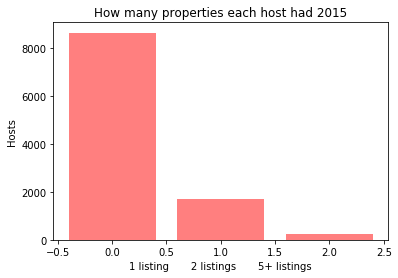

In [38]:
#Nico
host_number15 = Air_15.groupby(['host_id'])
host_number15 = host_number15.count()
host_number1_15 = host_number15.loc[(host_number15['id']) == 1]
host_number1_15 = host_number1_15['id'].count()
host_number2_15 = host_number15.loc[(host_number15['id'] >= 2) & (host_number15['id'] < 5)]
host_number2_15 = host_number2_15['id'].count()
host_number5_15 = host_number15.loc[(host_number15['id'] >= 5)]
host_number5_15 = host_number5_15['id'].count()
hosts = [host_number1_15, host_number2_15,host_number5_15]
x_axis = np.arange(len(hosts))
plt.bar(x_axis, hosts, color='r', alpha=0.5, align="center")
plt.title("How many properties each host had 2015")
plt.xlabel("1 listing       2 listings       5+ listings")
plt.ylabel("Hosts")

In [39]:
#Nico
host_number16 = Air_16.groupby(['host_id'])
host_number16 = host_number16.count()
host_number1_16 = host_number16.loc[(host_number16['id']) == 1]
host_number1_16 = host_number1_16['id'].count()
host_number2_16 = host_number16.loc[(host_number16['id'] >= 2) & (host_number16['id'] < 5)]
host_number2_16 = host_number2_16['id'].count()
host_number5_16 = host_number16.loc[(host_number16['id'] >= 5)]
host_number5_16 = host_number5_16['id'].count()

Text(0, 0.5, 'Hosts')

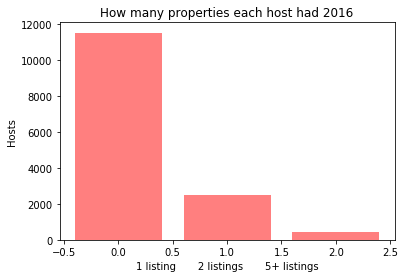

In [40]:
#Nico
hosts = [host_number1_16, host_number2_16,host_number5_16]
x_axis = np.arange(len(hosts))
plt.bar(x_axis, hosts, color='r', alpha=0.5, align="center")
plt.title("How many properties each host had 2016")
plt.xlabel("1 listing       2 listings       5+ listings")
plt.ylabel("Hosts")

Text(0, 0.5, 'Hosts')

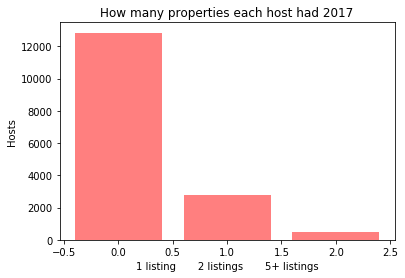

In [41]:
#Nico
host_number17 = Air_17.groupby(['host_id'])
host_number17 = host_number17.count()
host_number1_17 = host_number17.loc[(host_number17['id']) == 1]
host_number1_17 = host_number1_17['id'].count()
host_number2_17 = host_number17.loc[(host_number17['id'] >= 2) & (host_number17['id'] < 5)]
host_number2_17 = host_number2_17['id'].count()
host_number5_17 = host_number17.loc[(host_number17['id'] >= 5)]
host_number5_17 = host_number5_17['id'].count()
hosts = [host_number1_17, host_number2_17,host_number5_17]
x_axis = np.arange(len(hosts))
plt.bar(x_axis, hosts, color='r', alpha=0.5, align="center")
plt.title("How many properties each host had 2017")
plt.xlabel("1 listing       2 listings       5+ listings")
plt.ylabel("Hosts")

Text(0, 0.5, 'Hosts')

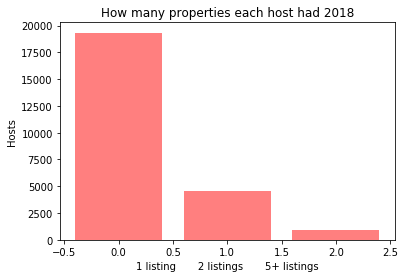

In [42]:
#Nico
host_number18 = Air_18.groupby(['host_id'])
host_number18 = host_number18.count()
host_number1_18 = host_number18.loc[(host_number18['id']) == 1]
host_number1_18 = host_number1_18['id'].count()
host_number2_18 = host_number18.loc[(host_number18['id'] >= 2) & (host_number18['id'] < 5)]
host_number2_18 = host_number2_18['id'].count()
host_number5_18 = host_number18.loc[(host_number18['id'] >= 5)]
host_number5_18 = host_number5_18['id'].count()
5
hosts = [host_number1_18, host_number2_18,host_number5_18]
x_axis = np.arange(len(hosts))
plt.bar(x_axis, hosts, color='r', alpha=0.5, align="center")
plt.title("How many properties each host had 2018")
plt.xlabel("1 listing       2 listings       5+ listings")
plt.ylabel("Hosts")

Text(0, 0.5, 'Hosts')

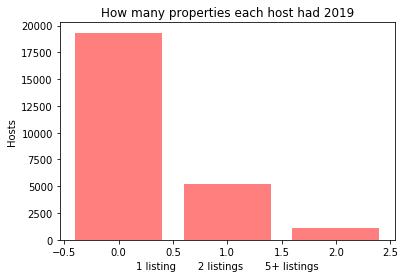

In [43]:
#Nico
host_number19 = Air_19.groupby(['host_id'])
host_number19 = host_number19.count()
host_number1_19 = host_number19.loc[(host_number19['id']) == 1]
host_number1_19 = host_number1_19['id'].count()
host_number2_19 = host_number19.loc[(host_number19['id'] >= 2) & (host_number19['id'] < 5)]
host_number2_19 = host_number2_19['id'].count()
2
host_number5_19 = host_number19.loc[(host_number19['id'] >= 5)]
host_number5_19 = host_number5_19['id'].count()
hosts = [host_number1_19, host_number2_19,host_number5_19]
x_axis = np.arange(len(hosts))
plt.bar(x_axis, hosts, color='r', alpha=0.5, align="center")
plt.title("How many properties each host had 2019")
plt.xlabel("1 listing       2 listings       5+ listings")
plt.ylabel("Hosts")

Text(0, 0.5, 'Hosts')

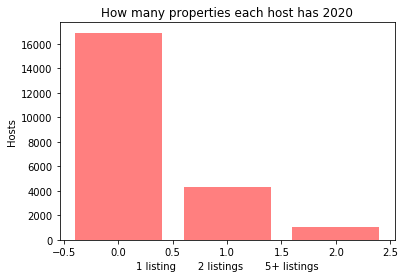

In [44]:
#Nico
#host_number = air_df.groupby(['host_id'])
#host_number = host_number.count()
# host_number1 = host_number.loc[(host_number['id']) == 1]
# host_number1 = host_number1['id'].count()
# host_number2 = host_number.loc[(host_number['id'] >= 2) & (host_number['id'] < 5)]
# host_number2 = host_number2['id'].count()
# host_number5 = host_number.loc[(host_number['id'] >= 5)]
# host_number5 = host_number5['id'].count()
hosts = [host_number1, host_number2,host_number5]
x_axis = np.arange(len(hosts))
plt.bar(x_axis, hosts, color='r', alpha=0.5, align="center")
plt.title("How many properties each host has 2020")
plt.xlabel("1 listing       2 listings       5+ listings")
plt.ylabel("Hosts")